# Video Game Sales

### Подключение библиотек

In [71]:
import pandas as pd
import numpy as np

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка данных

In [73]:
vgs = pd.read_csv("vgsales.csv")

In [74]:
vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### Описание данных

Этот набор данных содержит список видеоигр, продажи которых превысили 100 000 копий.

Name - Название игры

Platform - Платформа выпуска игр (например, PC, PS4 и т.д.)

Year - Год выпуска игры

Genre - Жанр игры

Publisher - Издатель игры

NA_Sales - Продажи в Северной Америке (в миллионах)

EU_Sales - Продажи в Европе (в миллионах)

JP_Sales - Продажи в Японии (в миллионах)

Other_Sales - Продажи в остальном мире (в миллионах)

Global_Sales - Общий объем продаж по всему миру.


##### Выведите размерность и краткую информацию о наборе данных

In [15]:
vgs.shape

(16598, 11)

In [16]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Выведите краткую статистическую информацию по набору данных

In [18]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
vgs[['Name','Platform','Genre','Publisher']].describe()

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


##### Проверьте набор данных на наличие пропущенных и дублирующих значений

In [22]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [29]:
print(vgs.duplicated().sum())

0


#### Напишите краткий вывод о наборе данных

### Заполнение пустых записей

Удалите пропущенные значения по признаку Publisher, а по признаку Year - замените на среднее значение. Значения по полю Year преобразуйте в целый тип. Удалите признак Rank. После преобразований, убедитесь, что изменения сохранились в наборе данных.

In [112]:
newvgs = newvgs[newvgs['Publisher'].notna()]
newvgs

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [166]:
mean_years = newvgs['Year'].mean()
newvgs['Year'].fillna(mean_years)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16540, dtype: int64

In [167]:
newvgs['Year'] = pd.to_numeric(newvgs['Year'], errors='coerce')
mean_year = newvgs['Year'].mean()
newvgs['Year'] = newvgs['Year'].fillna(mean_year)
newvgs['Year'] = newvgs['Year'].astype(int)

In [168]:
if 'Rank' in newvgs.columns:
    newvgs = newvgs.drop('Rank', axis=1)

In [169]:
newvgs.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [170]:
newvgs.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [171]:
newvgs.shape

(16540, 10)

In [172]:
newvgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16540 non-null  object 
 1   Platform      16540 non-null  object 
 2   Year          16540 non-null  int64  
 3   Genre         16540 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16540 non-null  float64
 6   EU_Sales      16540 non-null  float64
 7   JP_Sales      16540 non-null  float64
 8   Other_Sales   16540 non-null  float64
 9   Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


### Анализ продаж видеоигр

#### 1. В каком году было выпущено больше всего игр? Выведите первые 10 записей.

In [203]:
games_by_year = newvgs.groupby('Year').size().reset_index(name='Games_Count')
top_years = games_by_year.sort_values('Games_Count', ascending=False).head(10)
top_years

,Year,Games_Count
29,2009,1431
28,2008,1428
30,2010,1257
26,2006,1257
27,2007,1201
31,2011,1136
25,2005,936
22,2002,829
23,2003,775
24,2004,744


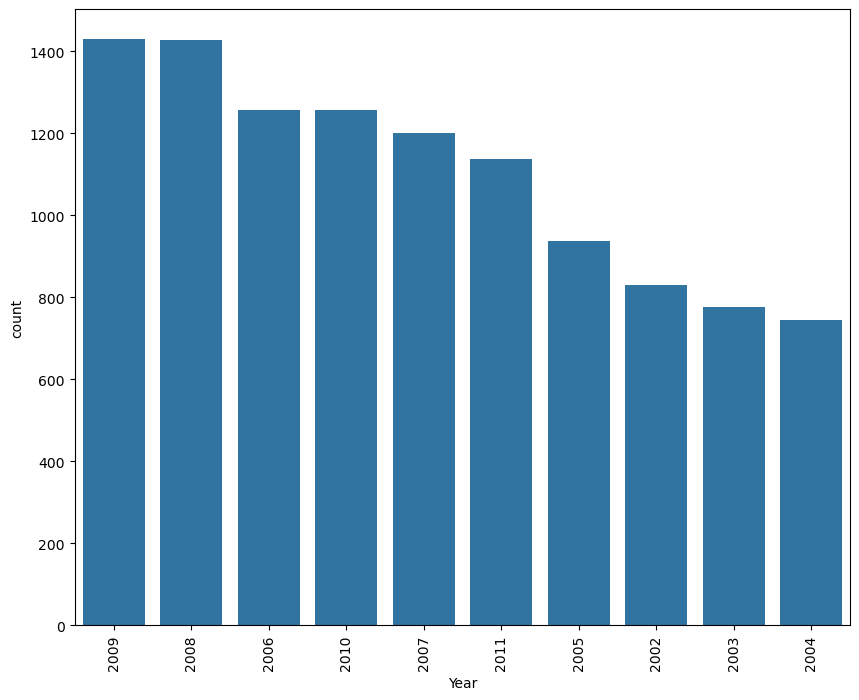

In [204]:
plt.figure(figsize=(10, 8))
sns.countplot(x="Year", data=newvgs, order = newvgs['Year'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

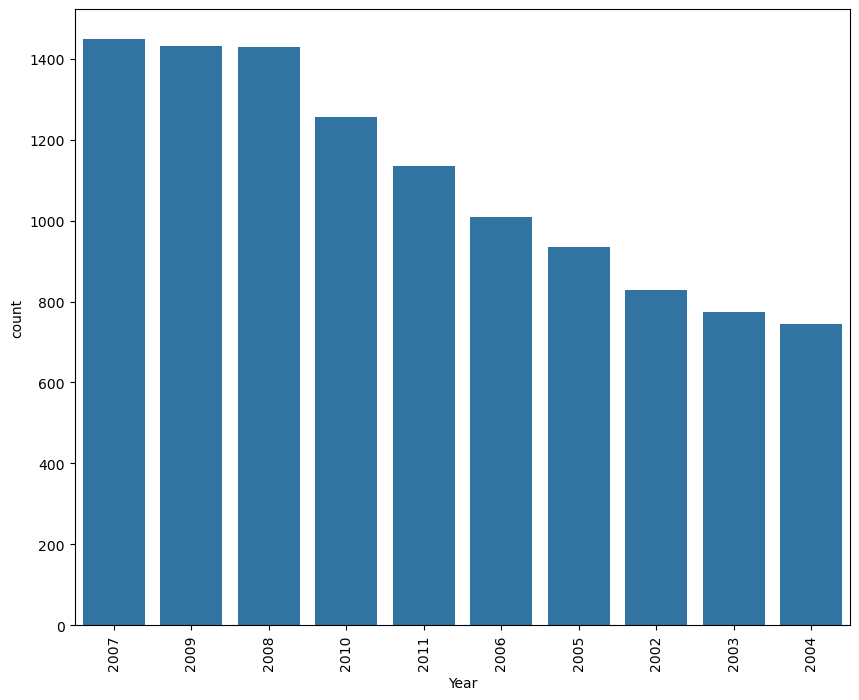

In [55]:
plt.figure(figsize=(10,8))
plt.bar(newvgs['Year'], newvgs['count'], align='center', width=0,5)
plt.xticks(newvgs['Year'])
plt.ylabel('Count')
plt.xlabel('City')
plt.tight_layout()
plt.show()

In [211]:
print(newvgs['Platform'].drop_duplicates().value_counts().sum())
print(newvgs['Genre'].drop_duplicates().value_counts().sum())
print(newvgs['Publisher'].drop_duplicates().value_counts().sum())

31
12
578


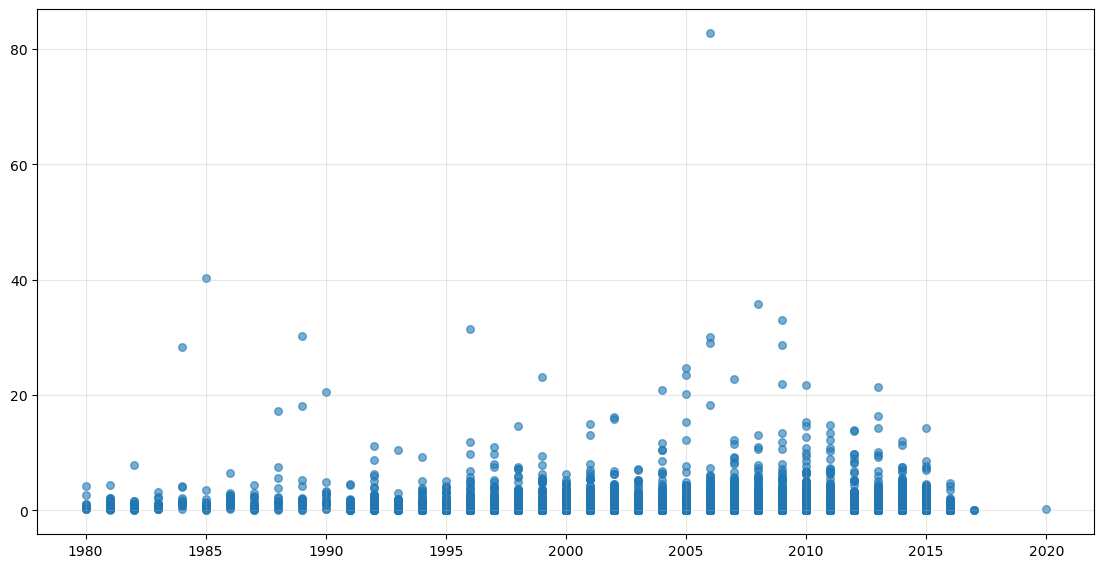

In [221]:
plt.figure(figsize=(30, 15))
plt.subplot(2, 2, 1)
plt.scatter(newvgs['Year'], newvgs['Global_Sales'], alpha=0.6, s=30)
plt.grid(True, alpha=0.3)
plt.show()

#### 2. Получите среднюю стоимость продаж в Европе 

In [227]:
print(newvgs['EU_Sales'].mean())

0.1468833131801693


#### 3. Получите максимальную стоимость продаж в Японии и вывведите полную информацию об игре с максимальной суммой продаж

In [230]:
print(newvgs['JP_Sales'].max())

10.22


In [237]:
newvgs['JP_Sales'].idxmax()
newvgs.loc[max_jp_sales_idx]

Name            Pokemon Red/Pokemon Blue
Platform                              GB
Year                                1996
Genre                       Role-Playing
Publisher                       Nintendo
NA_Sales                           11.27
EU_Sales                            8.89
JP_Sales                           10.22
Other_Sales                          1.0
Global_Sales                       31.37
Name: 4, dtype: object

##### Выведите первые 10 записей с максимальными суммами продажам в Японии по годам

In [243]:
max_jp_sales_by_year = newvgs.groupby('Year')['JP_Sales'].max().reset_index()
top_10_years = max_jp_sales_by_year.nlargest(10, 'JP_Sales')
top_10_years

,Year,JP_Sales
16,1996,10.22
19,1999,7.20
5,1985,6.81
26,2006,6.50
30,2010,5.65
22,2002,5.38
25,2005,5.33
29,2009,4.70
32,2012,4.36
33,2013,4.34


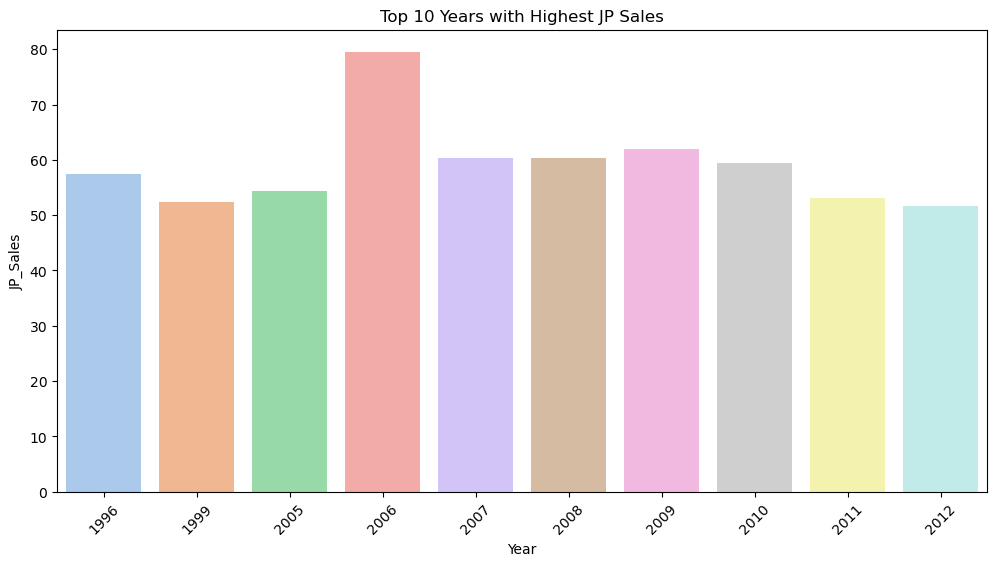

In [250]:
top_years = newvgs.groupby('Year')['JP_Sales'].sum().nlargest(10).index
data = newvgs[newvgs['Year'].isin(top_years)].groupby('Year')['JP_Sales'].sum()

plt.figure(figsize=(12,6)) 
sns.barplot(x=data.index, y=data.values, hue=data.index, palette='pastel', legend=False)
plt.xlabel('Year')
plt.ylabel('JP_Sales')
plt.title('Top 10 Years with Highest JP Sales')
plt.xticks(rotation=45)
plt.show()

#### 4. К какому жанру относится видеоигра "Brain Age 2: More Training in Minutes a Day" video game?

In [257]:
newvgs[newvgs['Name'] == 'Brain Age 2: More Training in Minutes a Day']['Genre']

27    Puzzle
Name: Genre, dtype: object

#### 5.  Каков объём продаж видеоигры «Grand Theft Auto: Vice City» по всему миру?

In [258]:
newvgs[newvgs['Name'] == 'Grand Theft Auto: Vice City']['Global_Sales']

24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

In [259]:
newvgs[newvgs['Name'] == 'Grand Theft Auto: Vice City']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
13732,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04


#### 6. Выведите название видеоигры, которая имеет самые высокие продажи в Северной Америке.

In [260]:
newvgs[newvgs['NA_Sales'] == vgs['NA_Sales'].max()]['Name']

0    Wii Sports
Name: Name, dtype: object

#### 7. Выведите видеоигры с самыми низкими продажами в мире

In [261]:
newvgs[newvgs['Global_Sales'] == newvgs['Global_Sales'].min()][['Name', 'Global_Sales']]

,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


#### 8. Игр какого жанра было создано больше всего?

In [265]:
newvgs['Genre'].nunique()

12

In [266]:
newvgs['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [267]:
newvgs['Genre'].value_counts()

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

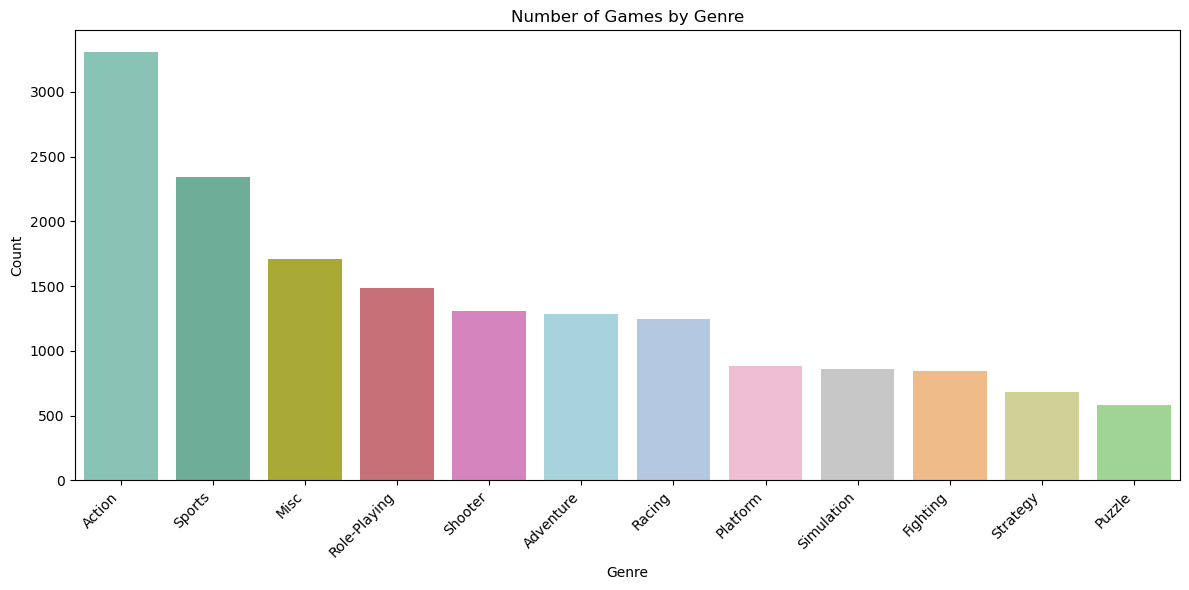

In [272]:
genre_counts = newvgs['Genre'].value_counts()
plt.figure(figsize=(12,6))
colors = ['#7fcdbb', '#63b79b', '#bcbd22', '#d6616b', '#e377c2', '#9edae5', '#aec7e8', '#f7b6d2', '#c7c7c7', '#ffbb78', '#dbdb8d', '#98df8a']
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette=colors, legend=False)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Games by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 9. Лучшие игры за 5 лет выпуска по жанрам

C:\Users\sondi\AppData\Local\Temp\ipykernel_17532\677516893.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_games = vgs_last_five.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

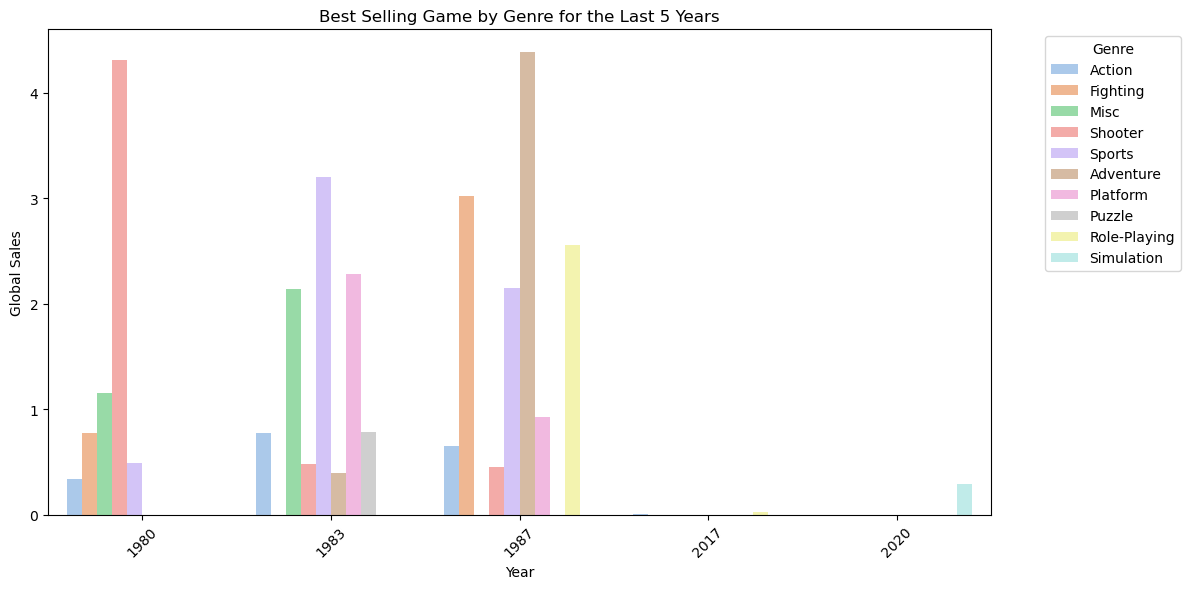

In [275]:
last_five_years = newvgs['Year'].unique()[-5:]
vgs_last_five = newvgs[newvgs['Year'].isin(last_five_years)]
best_games = vgs_last_five.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=best_games, palette='pastel')
plt.title('Best Selling Game by Genre for the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 10.  В каком году были самые высокие продажи по всему миру?¶

In [165]:
data_year.head(10)

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


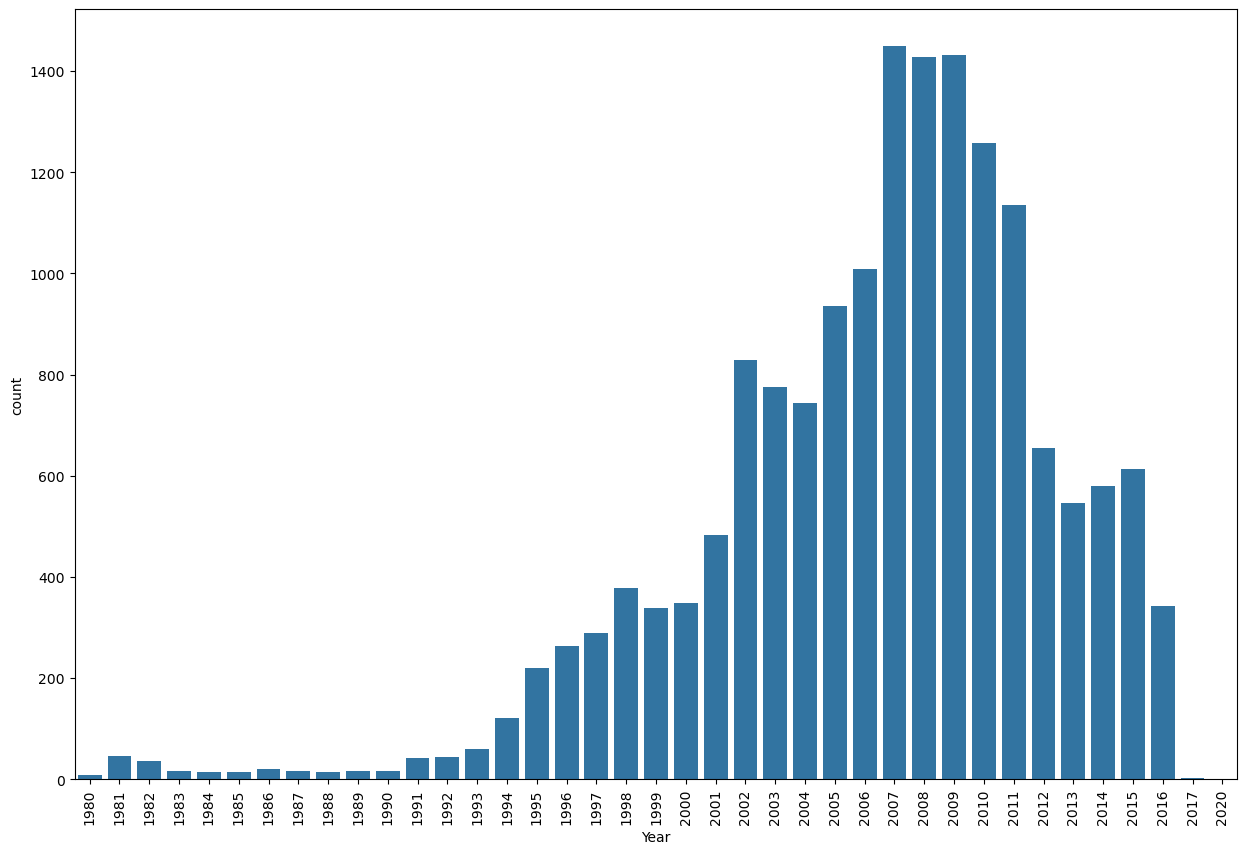

#### 11. Игры какого жанра имеют самую высокую цену продажи в мире

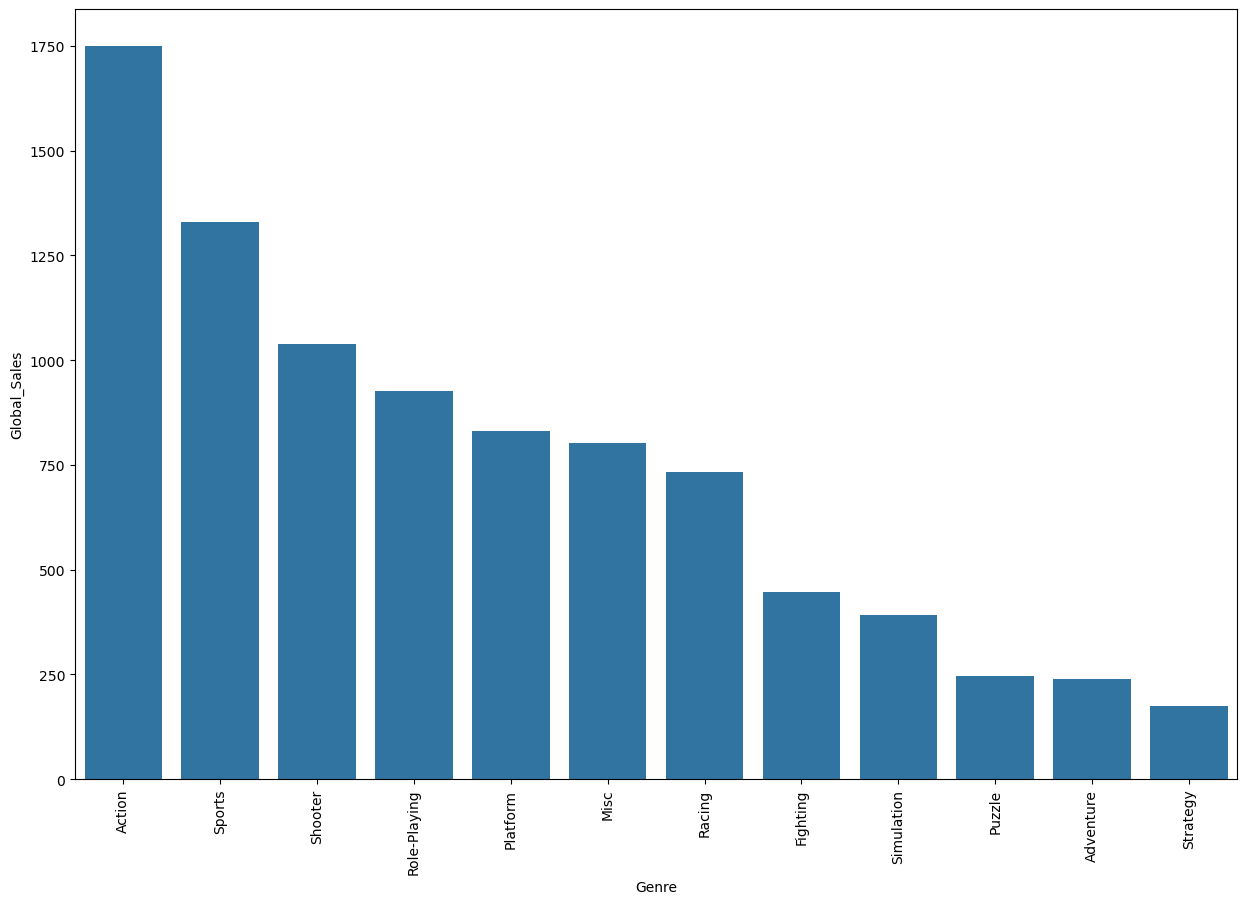

#### 12. На какой платформе самая высокая цена продажи в мире?

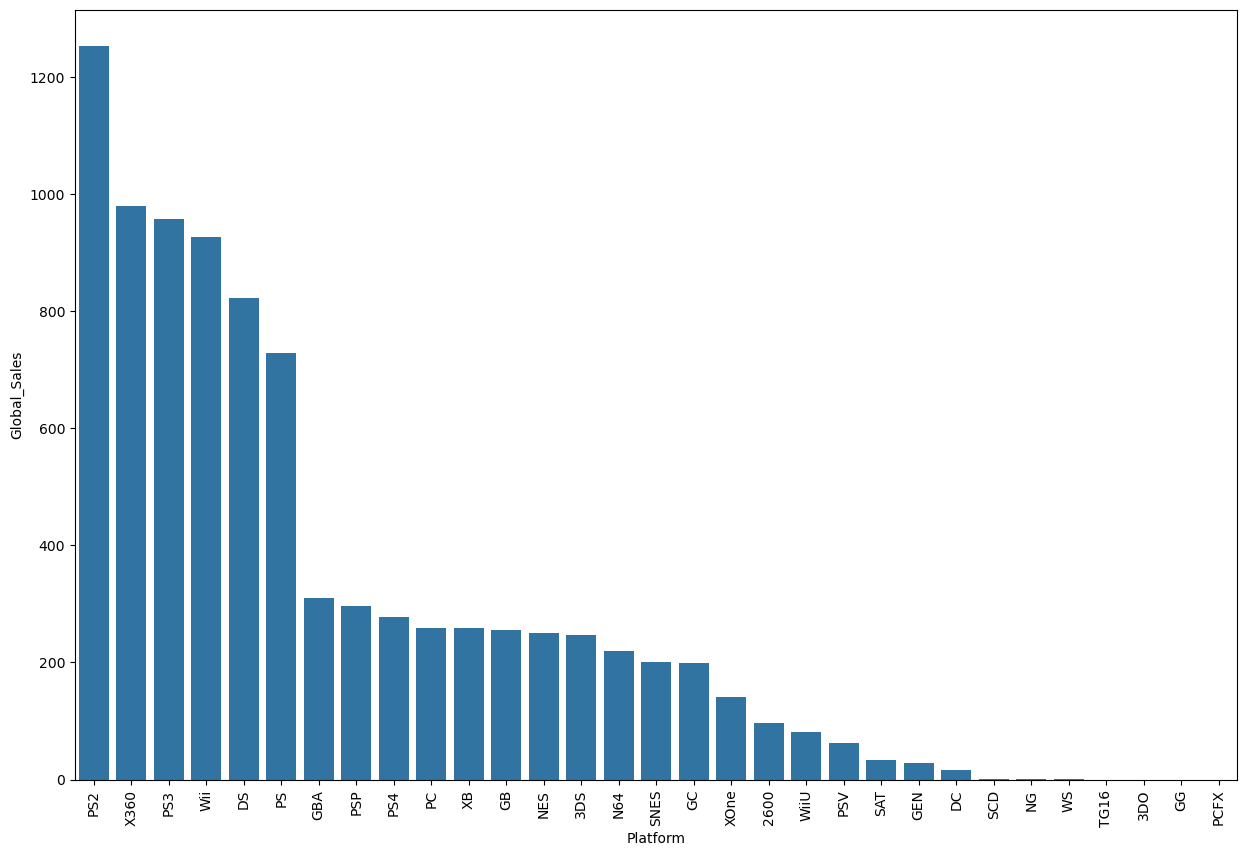

#### 13. Выведите топ 20 Publisher

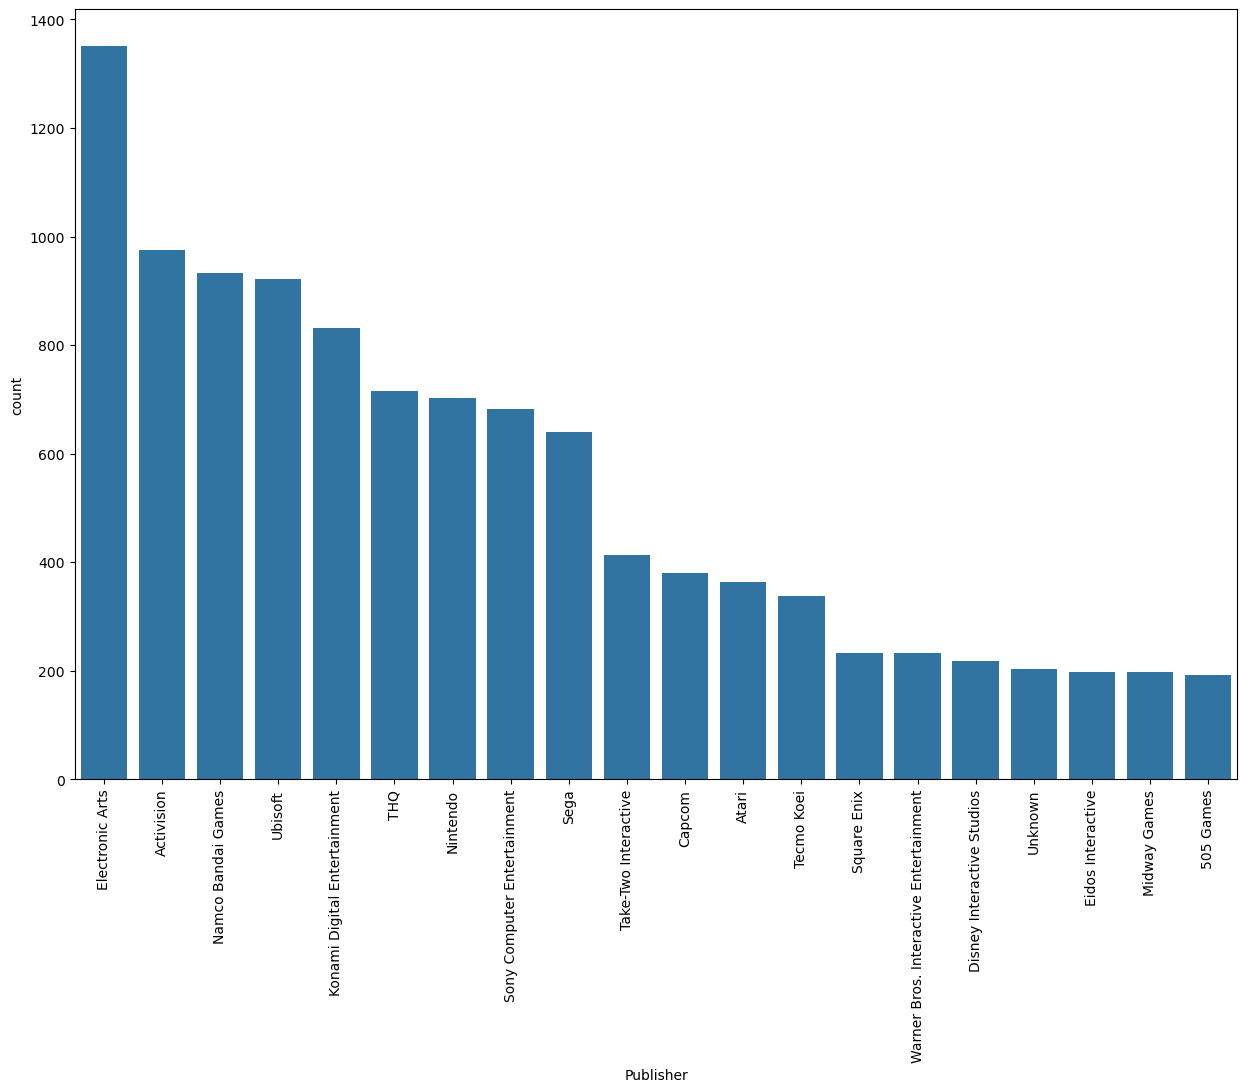

#### 14. Общий доход по регионам

In [119]:
vgs

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


,region,sale
0,NA_Sales,4384.41
1,EU_Sales,2429.45
2,JP_Sales,1290.09
3,Other_Sales,797.08


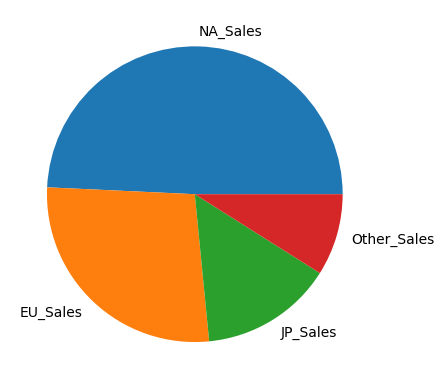

<Axes: xlabel='region', ylabel='sale'>

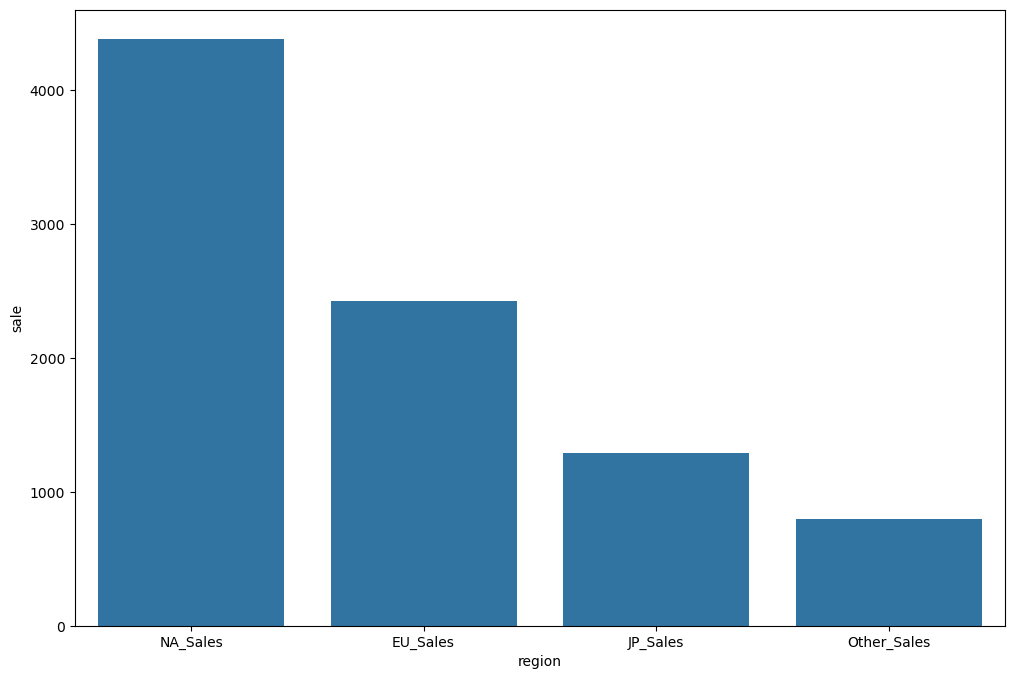

<Axes: >

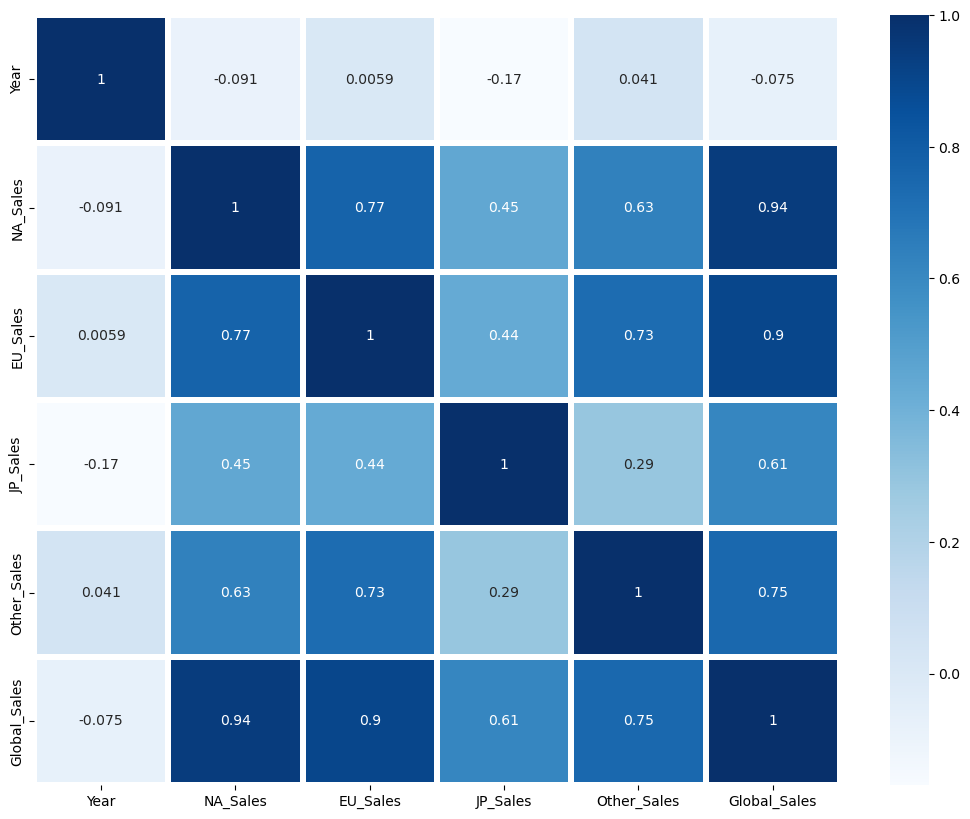

### 15.Pair plot

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


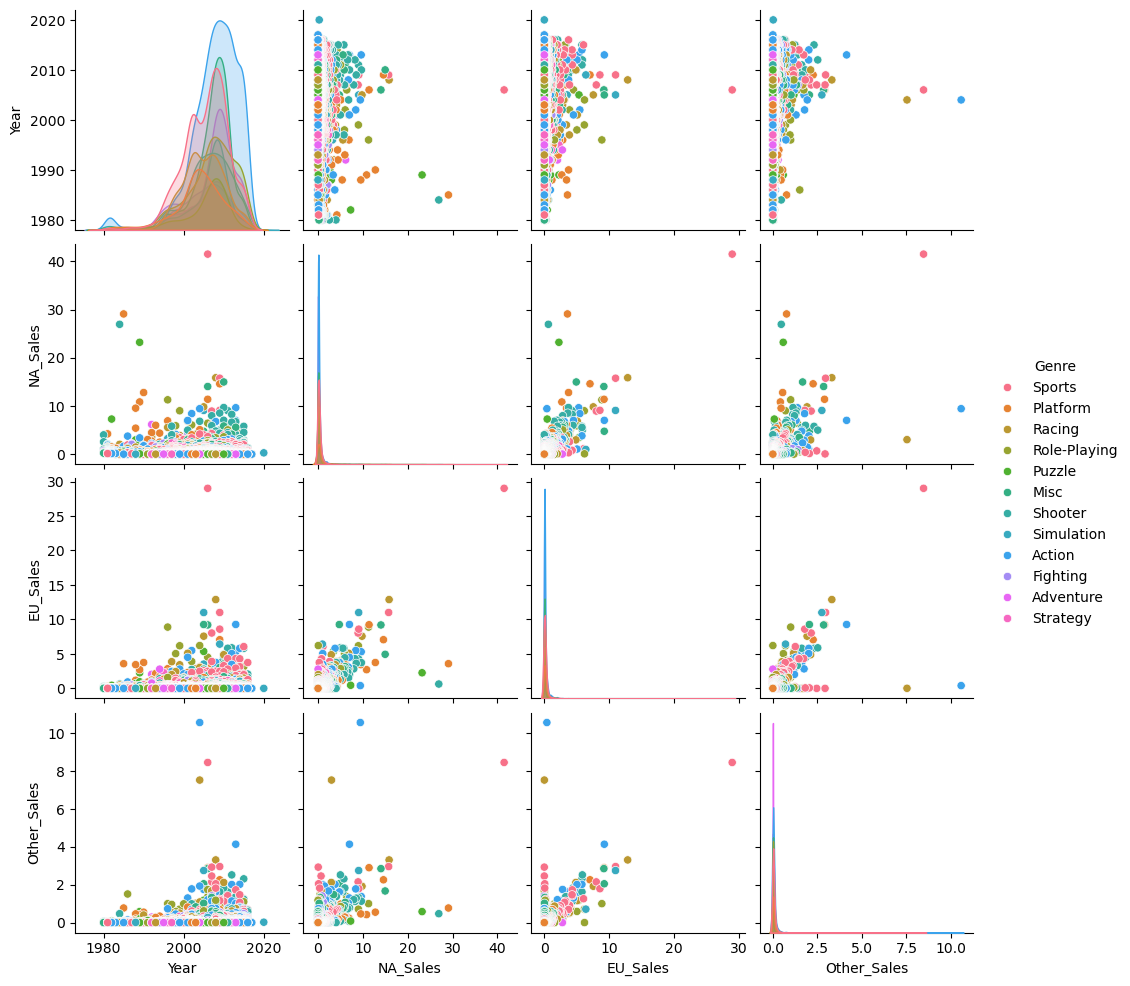

#### 16. Выведите 3 самых распространенных жанра видеоигр в мире

Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

### 17. В названиях скольких видеоигр есть слово «super» ??

287